In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

In [3]:
warnings.filterwarnings(action = 'ignore')
plt.rc('font',family = 'malgun gothic')

* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [4]:
data = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')

In [5]:
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 결측값 확인 

In [8]:
cols = df.columns

na_cols = []

for _ in cols:
    if df[_].isna().sum() > 1:
        na_cols.append(_)        

# 결측치 처리 

In [9]:
df[na_cols].isna().sum()

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
glucose       388
dtype: int64

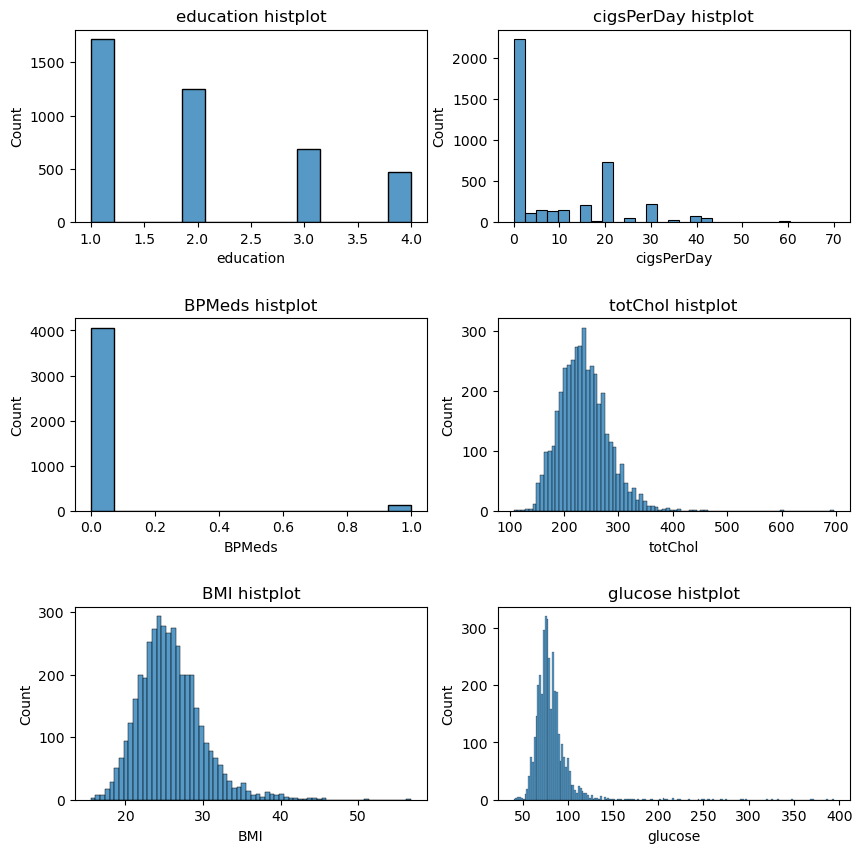

In [10]:
plt.figure(figsize = [10,10])
plt.subplots_adjust(hspace = 0.5)

i = 1

for _ in na_cols:
    
    plt.subplot(3,2,i)
    
    sns.histplot(data = df,
                 x = _)
    
    plt.title(f'{_} histplot')
    
    i += 1

* BMI , glucose 같은 경우는 오른쪽으로 꼬리가 긴 형태기 때문에 평균값보다 중앙값으로 대치해줘야겠다.
* cigsperday 같은 경우는 담배를 피는 경우엔 흡연자들의 평균값으로, 담배를 피지 않는 경우엔 0으로 변경해주자 
* education 과 BP med 같은 경우는 최빈값으로 대치하자 

* 결측값은 최빈값으로 처리 

In [11]:
freq_edu = df['education'].value_counts().sort_values().index[-1]
freq_BPmed= df['BPMeds'].value_counts().sort_values().index[-1]

In [12]:
df['education'].fillna(freq_edu,inplace = True)
df['BPMeds'].fillna(freq_BPmed,inplace = True)

In [13]:
df.loc[df['cigsPerDay'].isna(),['currentSmoker','cigsPerDay']] #전부 담배는 피는데 얼마나 피는지 체크를 안했네 

,currentSmoker,cigsPerDay
131,1,NaN
139,1,NaN
1046,1,NaN
1292,1,NaN
1347,1,NaN
1451,1,NaN
1497,1,NaN
1610,1,NaN
1625,1,NaN
1870,1,NaN


In [14]:
df['cigsPerDay'].fillna(df.loc[df['cigsPerDay']>0,'cigsPerDay'].median(),inplace = True)

In [15]:
for _ in ['totChol', 'BMI', 'glucose','heartRate']:
    df[_].fillna(df[_].median(),inplace = True)

In [16]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# 간단한 시각화(EDA)

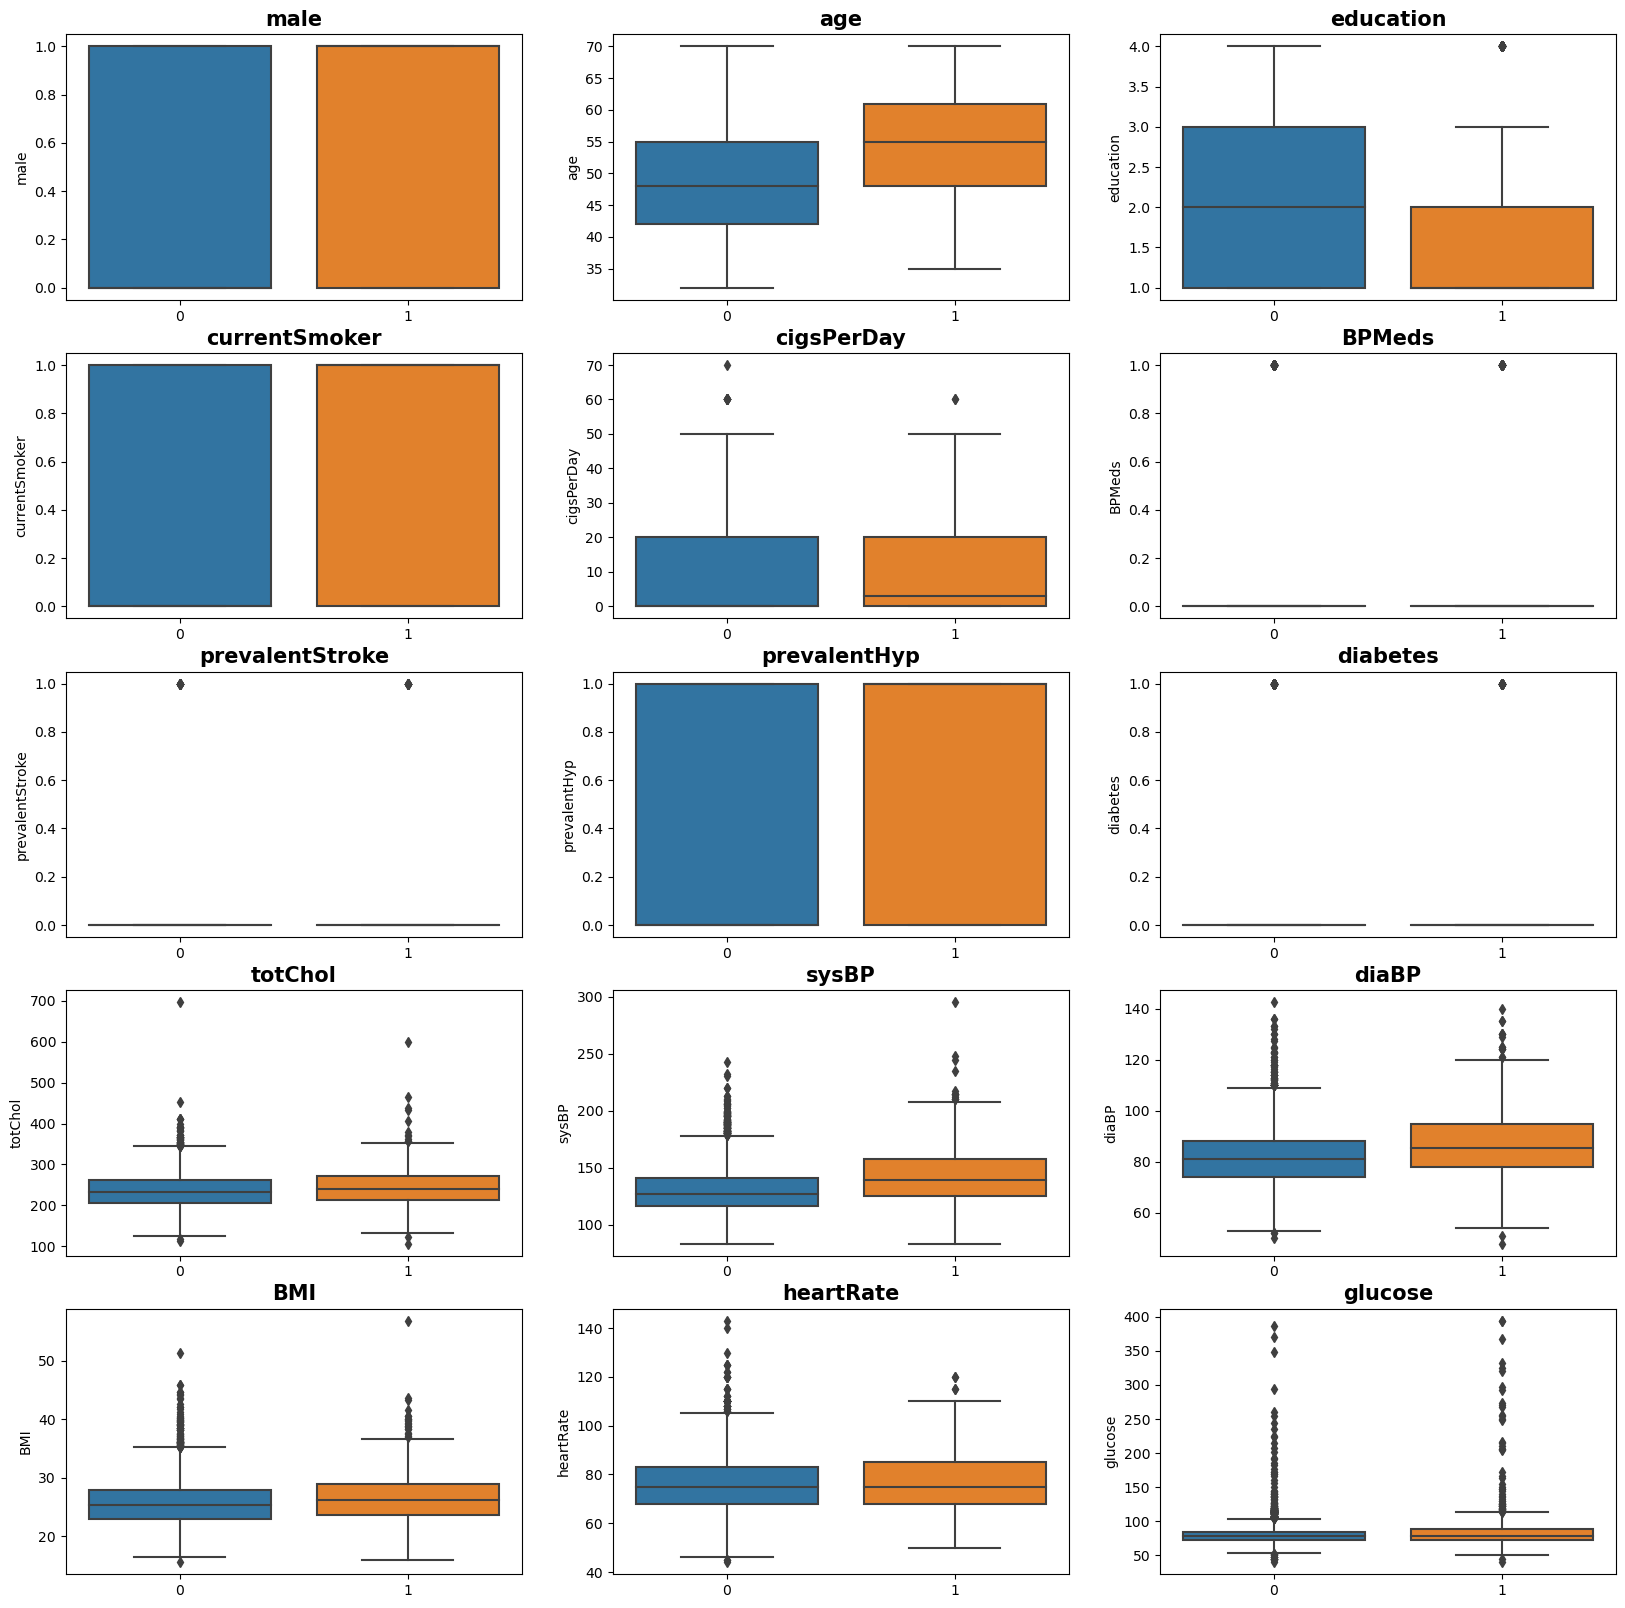

In [17]:
cols = df.columns[:-1]
plt.figure(figsize = [20,20])

i = 1

for _ in cols:
    
    plt.subplot(int(len(cols)/3),3,i)
    
    sns.boxplot(data = df,
                x = 'TenYearCHD',
                y = _)
    
    plt.title(_,size = 15,weight = 'bold')
    plt.xlabel('')
    
    i += 1

* 심부전 환자와 심부전이 아닌 환자 간의 특징적인 차이를 보지 못하겠다. 

# 모델링(Modeling)

In [18]:
def min_max_scaler(df,cols):
    
    return (df[cols]- np.min(df[cols])) / (np.max(df[cols]) - np.min(df[cols]))

In [19]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### min-max scaling 은 데이터의 범위를 제한 시켜 모델링의 속도를 증가 시켜주는 장점도 있지만
### 데이터의 분포를 변경시키지 않는 장점이 있다.

In [20]:
cols = df.max()[df.max() > 4].index.tolist() #범주형 변수를 제외하고 모두 min_max_scaling

for _ in cols:
    df[_] = min_max_scaler(df,_)

In [21]:
x_train,y_train,x_test,y_test = train_test_split(df.drop('TenYearCHD',axis = 1),df['TenYearCHD'],
                                                test_size = 0.2,random_state = 2023)

In [22]:
x = np.array(x_train)
result = np.array(x_test).reshape(-1,1)

* 모델링을 위해 상수항 추가 

In [23]:
constant = np.ones(x.shape[0]).reshape(-1,1)

x_new = np.c_[constant,x] # 상수항 추가 

theta = np.zeros(x_new.shape[1]).reshape(-1,1)

print('x_new의 shape :',x_new.shape)
print('theta의 shape :',theta.shape)
print('result의 shape:',result.shape)

x_new의 shape : (3390, 16)
theta의 shape : (16, 1)
result의 shape: (3390, 1)


* 시그모이드 함수 생성

In [24]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

* 크로스엔트로피, 크로스엔트로피 미분값 생성 

In [25]:
def cross_entropy(X,Y,theta):
    return np.mean(-Y*np.log(sigmoid(X@theta)) - (1-Y)*np.log(1 - sigmoid(X@theta)))

In [26]:
def gradient(X,Y,theta):
    return X.T@(sigmoid(X@theta) - Y)

In [27]:
iteration = 100000

alpha = 0.00001

entropy_list = []
cost_list = []

theta = np.zeros(x_new.shape[1]).reshape(-1,1)

for _ in range(iteration+1):
    
    predicted = sigmoid(x_new@theta)
    
    error = np.sum(result - predicted)
    
    entropy = cross_entropy(x_new,result,theta)
    cost = gradient(x_new,result,theta)
    
    entropy_list.append(entropy)
    cost_list.append(np.sum(cost))
    
    theta -= alpha * cost
    
    if _ % 10000 == 0:
        print(f'{_}번째',f'entropy :{entropy}',f'gradient:{np.sum(cost)}',sep = '|')

0번째|entropy :0.6931471805599453|gradient:7160.537368501542
10000번째|entropy :0.39070721287573695|gradient:-20.763417429227868
20000번째|entropy :0.3861228618020915|gradient:-12.681115191324626
30000번째|entropy :0.3845599222547212|gradient:-8.638480568136668
40000번째|entropy :0.3838194694059537|gradient:-6.111461220636837
50000번째|entropy :0.38340829575666446|gradient:-4.446711960436243
60000번째|entropy :0.383152177766799|gradient:-3.323755171789699
70000번째|entropy :0.3829790846355269|gradient:-2.5487809271072255
80000번째|entropy :0.3828558206714446|gradient:-2.0004388871777685
90000번째|entropy :0.38276523652793276|gradient:-1.6021723427993442
100000번째|entropy :0.38269741455215933|gradient:-1.3052835687443318


Text(0.5, 1.0, 'gradient')

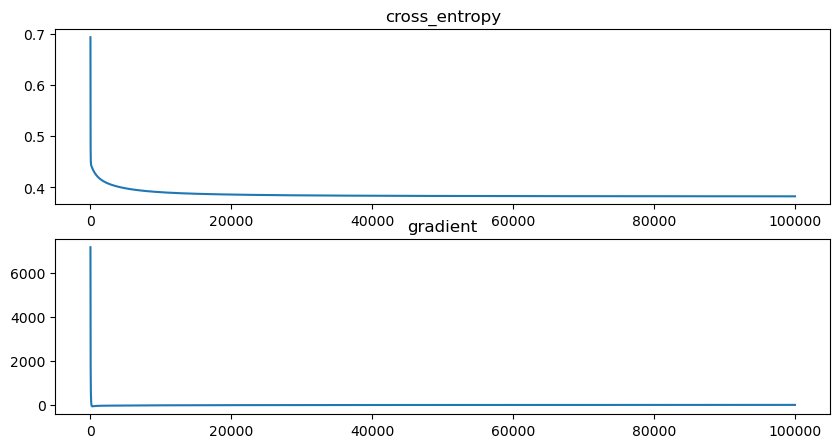

In [28]:
fig = plt.figure(figsize = [10,5])

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(range(len(entropy_list)),entropy_list)
ax2.plot(range(len(cost_list)),cost_list)

ax1.set_title('cross_entropy')
ax2.set_title('gradient')

In [29]:
prob = sigmoid(x_new@theta) # x 값이 1일 확률 
print(prob[:10])
#이제 적절한 threshold 를 찾아야 한다.

[[0.09916383]
 [0.10733268]
 [0.20422631]
 [0.20589065]
 [0.39694106]
 [0.16324051]
 [0.11116181]
 [0.12891801]
 [0.0792737 ]
 [0.02620165]]


In [30]:
threshold = np.arange(0,1.01,0.01)

score_list = []

for _ in threshold:
    
    prediction = (prob > _).astype(int)
    
    score = np.sum(result == prediction) / len(result)
    
    score_list.append(score)
    
    if round(_,2) * 100 % 10 == 0:
        print(f'Threshold {round(_,2)}:',round(score,4))

Threshold 0.0: 0.1546
Threshold 0.1: 0.5133
Threshold 0.2: 0.7481
Threshold 0.3: 0.8215
Threshold 0.4: 0.844
Threshold 0.5: 0.8531
Threshold 0.6: 0.8496
Threshold 0.7: 0.8463
Threshold 0.8: 0.8454
Threshold 0.9: 0.8454
Threshold 1.0: 0.8454


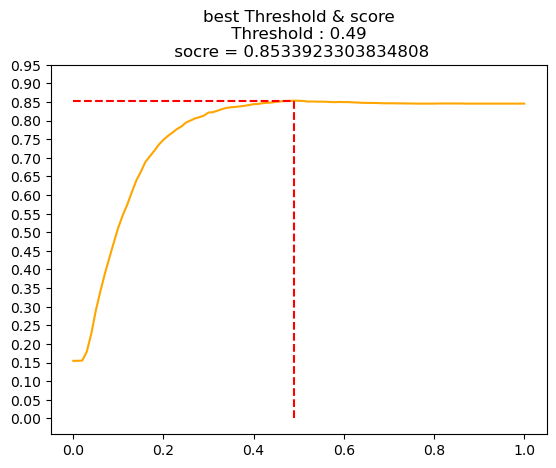

In [31]:
idx = np.argmax(score_list)

plt.plot(threshold,score_list,c = 'orange')
plt.plot([0,threshold[idx]],[score_list[idx],score_list[idx]],'k--',c = 'red')
plt.plot([threshold[idx],threshold[idx]],[0,score_list[idx]],'k--', c = 'red')

plt.title(f'best Threshold & score\n Threshold : {threshold[idx]} \n socre = {score_list[idx]}')

plt.yticks(ticks = np.arange(0,1,0.05));

# 테스트 세트에 검증 

In [32]:
Y = np.array(y_train)

In [33]:
constant = np.ones(Y.shape[0]).reshape(-1,1)

Y = np.c_[constant,Y]
y_test = np.array(y_test).reshape(-1,1)

In [34]:
prediction= (sigmoid(Y@theta)>0.49).astype(int)

print(np.sum(prediction == y_test)/ len(y_test))

#예측률 86% 

0.8632075471698113
